In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
pwd

'C:\\Users\\Escanor\\Desktop\\Iron HAck\\Projetos\\Shark Attacks\\Shark-Atack'

In [3]:
attacks = pd.read_csv('data/attacks.csv', encoding='latin1', sep=',')

In [4]:
attacks.shape

(25723, 24)

In [5]:
pd. set_option("display.max_columns", None)

In [6]:
attacks.head(5)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0,NaN,NaN
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0,NaN,NaN
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0,NaN,NaN
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0,NaN,NaN
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0,NaN,NaN


In [7]:
attacks.info()  # according to this informations, i will check columns Unnamed: 22 and Unnamed: 23

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

In [8]:
attacks_Unnamed_22 = attacks[attacks['Unnamed: 22'].notnull()]
attacks_Unnamed_22

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
1478,2006.05.27,27-May-2006,2006.0,Unprovoked,USA,Hawaii,"North Shore, O'ahu",Surfing,Bret Desmond,M,31,"No injury, shark bumped surfboard",N,16h00,NaN,R. Collier,2006.05.27-Desmond.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2006.05.27,2006.05.27,4825.0,stopped here,NaN


In [9]:
attacks_Unnamed_23 = attacks[attacks['Unnamed: 23'].notnull()]
attacks_Unnamed_23

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
4415,1952.03.30,30-Mar-1952,1952.0,Unprovoked,NETHERLANDS ANTILLES,Curacao,NaN,Went to aid of child being menaced by the shark,A.J. Eggink,M,NaN,"Buttock bitten, tissue removed",N,NaN,"Bull shark, 2.7 m [9'] was captured & dragged ...","J. Randall, p.352 in Sharks & Survival; H.D. B...",1952.03.30-Eggink.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1952.03.30,1952.03.30,1888.0,NaN,Teramo
5840,1878.09.14.R,Reported 14-Sep-1878,1878.0,Provoked,USA,Connecticut,"Branford, New Haven County",Fishing,Captain Pattison,M,NaN,Leg bitten by netted shark PROVOKED INCIDENT,N,NaN,NaN,"St. Joseph Herald, 9/14/1878",1878.09.14.R-Pattison.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,1878.09.14.R,1878.09.14.R,463.0,NaN,change filename


In [10]:
attacks.drop(['Unnamed: 23', 'Unnamed: 22'], axis='columns', inplace=True)  # Considering that columns Unnamed: 23 and Unnamed: 22  don't have any important information I drop them. 

attacks

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
0,2018.06.25,25-Jun-2018,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,"No injury to occupant, outrigger canoe and pad...",N,18h00,White shark,"R. Collier, GSAF",2018.06.25-Wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-Jun-2018,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,Minor injury to left thigh,N,14h00 -15h00,NaN,"K.McMurray, TrackingSharks.com",2018.06.18-McNeely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-Jun-2018,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,Injury to left lower leg from surfboard skeg,N,07h45,NaN,"K.McMurray, TrackingSharks.com",2018.06.09-Denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-Jun-2018,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,Minor injury to lower leg,N,NaN,2 m shark,"B. Myatt, GSAF",2018.06.08-Arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-Jun-2018,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,Lacerations to leg & hand shark PROVOKED INCIDENT,N,NaN,"Tiger shark, 3m",A .Kipper,2018.06.04-Ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25719,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25721,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
attacks_clear  = attacks.dropna( thresh=0.9*len(attacks.columns))  # Dropping rows that have more than 90% empty information

In [12]:
attacks_clear.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [13]:
columns_clear =  [item.strip() for item in attacks_clear.columns ]  # cleaning the columns names

print (columns_clear)

['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location', 'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time', 'Species', 'Investigator or Source', 'pdf', 'href formula', 'href', 'Case Number.1', 'Case Number.2', 'original order']


In [14]:
attacks_clear.columns = columns_clear # Changing the columns names for the clear ones.

attacks_clear.columns

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order'],
      dtype='object')

In [15]:

attacks_clear['Fatal (Y/N)'].value_counts() #Checking Fatal (Y/N) column values


N          3227
Y           677
UNKNOWN      15
 N            5
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [16]:
attacks_clear.loc[ : ,'Fatal (Y/N)'] = attacks_clear.loc[ : ,'Fatal (Y/N)'].str.strip() # cleaning all rows

C:\Programas\Anaconda\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [17]:
attacks_clear['Fatal (Y/N)'].value_counts()

N          3232
Y           677
UNKNOWN      15
M             1
2017          1
Name: Fatal (Y/N), dtype: int64

In [18]:
Fatal_value_M = attacks_clear.loc[attacks_clear['Fatal (Y/N)'] == 'M'] #checking row with M value information.
Fatal_value_M

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
285,2016.04.18.b,18-Apr-2016,2016.0,Provoked,FRENCH POLYNESIA,Tuamotos,Makemo Atoll,Spearfishing,Hoata Iotua,M,22,Laceration to knee by speared shark PROVOKED I...,M,Morning,"Grey reef shark, 2 m","TNTV News, 4/19/2016",2016.04.18.b-Iotua.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2016.04.18.b,2016.04.18.b,6018.0


In [19]:
attacks_clear.loc[attacks_clear['Fatal (Y/N)'] == 'M'] = 'N'    # changing M value for N

C:\Programas\Anaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [20]:
attacks_clear['Fatal (Y/N)'].value_counts() # checking if M disappear

N          3233
Y           677
UNKNOWN      15
2017          1
Name: Fatal (Y/N), dtype: int64

In [21]:
Fatal_value_2017 = attacks_clear.loc[attacks_clear['Fatal (Y/N)'] == '2017'] #checking row with 2017 value information.

Fatal_value_2017

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
786,2012.06.10,10-Jun-2012,2012.0,Provoked,ITALY,Sardinia,Muravera,Attempting to rescue an injured & beached shark,Giorgio Zara,M,57,Lower left leg injured PROVOKED ACCIDENT,2017,Morning,"Blue shark, 2.5m","D. Puddo, 6/11/2012",2012.06.10-Zara.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2012.06.10,2012.06.10,5517.0


In [22]:
attacks_clear.loc[attacks_clear['Fatal (Y/N)'] == '2017'] = 'N' # changing 2017 value for N

C:\Programas\Anaconda\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Programas\Anaconda\lib\site-packages\pandas\core\indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [23]:
attacks_clear['Fatal (Y/N)'].value_counts() #checking if 2017 disappear

N          3234
Y           677
UNKNOWN      15
Name: Fatal (Y/N), dtype: int64

In [24]:
attacks_clear.reset_index(drop=True, inplace = True) # reseting index

In [25]:
attacks_clear['Fatal (Y/N)'].value_counts('N')  # see the % of fatal attacks.

N          0.823739
Y          0.172440
UNKNOWN    0.003821
Name: Fatal (Y/N), dtype: float64

In [26]:
year_N = attacks_clear.loc[attacks_clear['Year'] == 'N'] #checking row with 2017 value information.

year_N

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Sex,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order
251,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
684,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N


In [27]:
attacks_clear =  attacks_clear.drop(year_N.index)


In [55]:
pd.options.display.max_rows = 400    # displaying 200 rows

In [32]:
pd.options.display.float_format = '{:.0f}'.format # changing the date display format

In [30]:
attacks_clear.loc[attacks_clear['Year'] == 0,'Year_clear'] = attacks_clear['Date'].astype(str).str.findall('\d+').str[0]  # creating a new column Year_clear and adding the year of the date column


attacks_clear.loc[attacks_clear['Year_clear'].isnull(),'Year_clear'] = attacks_clear['Year']  # adding values of the Year column on that null values of the Year_clear column

In [38]:
attacks_clear['Year_clear'] = attacks_clear['Year_clear'].astype(str).str.findall('\d+').str[0] # removing the .0 of the Year_clear column

In [42]:
attacks_clear['Year_clear'].value_counts( sort=False)

2018     49
2017    116
2016    114
2015    131
2014    105
2013    101
2012    104
2011    113
2010     88
2009    103
2008    105
2007     99
2006     90
2005     87
2004     79
2003     85
2002     81
2001     74
2000     80
1999     56
1998     57
1997     47
1996     43
1995     55
1984     32
1994     39
1993     39
1992     43
1991     36
1990     33
1989     43
1988     37
1987     23
1986     28
1985     28
1983     37
1982     29
1981     37
1980     25
1979     15
1978     18
1977     21
1976     23
1975     35
1974     28
1973     15
1972     23
1971     18
1970     25
1969     21
1968     29
1967     31
1966     46
1965     36
1964     48
1963     43
1962     55
1961     57
1960     60
1959     57
1958     34
1957     26
1956     31
1955     30
1954     22
1953     21
1952     16
1951     21
1950     29
1949     18
1948     12
1947     21
1946     18
1945      5
1944     13
1943      8
1942     11
1941     14
1940     14
1939     12
1938     10
1937     18
1936     17
1935

In [86]:
attacks_year =  attacks_clear.groupby(['Year_clear','Fatal (Y/N)'],as_index=False)['Case Number'].count()  # agrupamento das colunas Fatal (Y/N) e Year_clear. o count tem de ser feito com uma colunao que nao esta no aggrupamento

In [90]:
fatal_n = attacks_year.loc[attacks_year['Fatal (Y/N)'] == 'N']

<AxesSubplot:xlabel='Year_clear'>

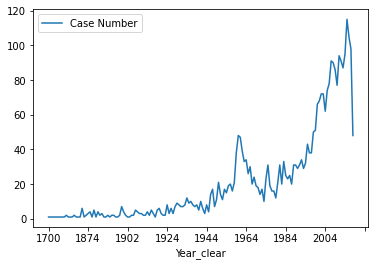

In [93]:
fatal_n[['Year_clear','Case Number']].set_index('Year_clear').plot()

<AxesSubplot:xlabel='Year_clear'>

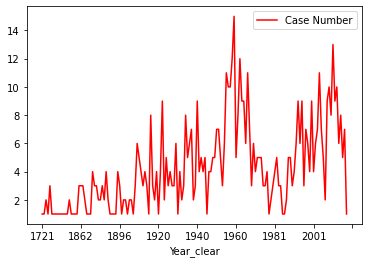

In [96]:
fatal_n = attacks_year.loc[attacks_year['Fatal (Y/N)'] == 'Y']

fatal_n[['Year_clear','Case Number']].set_index('Year_clear').plot(color = 'red')

<AxesSubplot:xlabel='Year_clear'>

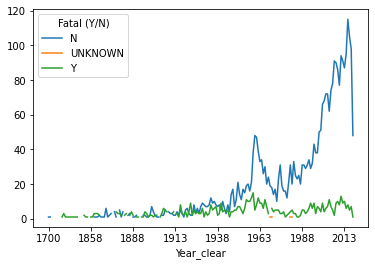

In [97]:
attacks_year.pivot_table(values='Case Number', index='Year_clear', columns='Fatal (Y/N)', aggfunc='sum').plot()